# Task 1 - Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

## 1. Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
data = pd.DataFrame(reviews,columns=['reviews'])
data.head()

,reviews
0,✅ Trip Verified | Absolutely horrible airline....
1,✅ Trip Verified | Having experienced delays a...
2,✅ Trip Verified | Travelled to Heathrow to Kal...
3,Not Verified | This flight failed at every le...
4,Not Verified | Beware of British Airways and ...


In [4]:
data.to_csv("BA_reviews.csv")

## 2. Data Cleaning

In [274]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from textblob import TextBlob
from wordcloud import WordCloud

# import requests
# import string
# from string import digits


- Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language. It supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities.

In [235]:
#Creating a new dataframe to work on called df
df = pd.read_csv('BA_reviews.csv')

#Splitting reviews into verification status and the review
df = df.reviews.str.split('|',expand=True)

#Renaming columns 
df.rename(columns = {0:'verified',1:'review'}, inplace = True)
df.head()

#Removing spaces in reviews
df.review.str.strip()

0      Absolutely horrible airline. Communication is ...
1      Having experienced delays and cancellations de...
2      Travelled to Heathrow to Kalamata and return j...
3      This flight failed at every level. We were del...
4      Beware of British Airways and their marketing ...
                             ...                        
995    London to Paris. I wish that they would update...
996    Delivering outstanding customer service onboar...
997    This was a night flight New York JFK to London...
998    Amman to London. Appalling service both on the...
999    Paphos to London Gatwick in Club Europe. We ha...
Name: review, Length: 1000, dtype: object

In [236]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   verified  1000 non-null   object
 1   review    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


,count,unique,top,freq
verified,1000,3,✅ Trip Verified,804
review,1000,1000,Absolutely horrible airline. Communication is...,1


In [237]:
df.isna().sum()

verified    0
review      0
dtype: int64

- There are no null values

In [238]:
df.verified.value_counts()

✅ Trip Verified     804
Not Verified        194
❎ Not Verified        2
Name: verified, dtype: int64

In [239]:
#Replacing Not verified with 0 and Verified with 1
df.verified[df.verified.str.find('Not Verified') >=0] = 'Unverified_review'
df.verified[df.verified.str.find('Trip Verified') >=0] = 'Verified_review'

#Check the number of verified and unverified values
df.verified.value_counts(normalize=True)

Verified_review      0.804
Unverified_review    0.196
Name: verified, dtype: float64

In [240]:
#Removing special characters and numbers from the review column, only keeping the alphabets
df['cleaned_reviews'] = df['review'].str.replace('[^\w\s]','')
df.head()

,verified,review,cleaned_reviews
0,Verified_review,Absolutely horrible airline. Communication is...,Absolutely horrible airline Communication is ...
1,Verified_review,Having experienced delays and cancellations ...,Having experienced delays and cancellations ...
2,Verified_review,Travelled to Heathrow to Kalamata and return ...,Travelled to Heathrow to Kalamata and return ...
3,Unverified_review,This flight failed at every level. We were d...,This flight failed at every level We were de...
4,Unverified_review,Beware of British Airways and their marketin...,Beware of British Airways and their marketin...


In [241]:
verified_status = df['verified']

In [242]:
df.drop(['review','verified'],inplace=True,axis=1)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [244]:
df.head()

,cleaned_reviews
0,Absolutely horrible airline Communication is ...
1,Having experienced delays and cancellations ...
2,Travelled to Heathrow to Kalamata and return ...
3,This flight failed at every level We were de...
4,Beware of British Airways and their marketin...


## 3.Tokenization
It is splitting the input data into a sequence of meaningful parts which are called tokens.

In [245]:
print(df['cleaned_reviews'][0])

 Absolutely horrible airline Communication is terrible Last minute delays cancellations seat changes with no communication App and website user experience is years behind other airlines Seats are cramped and uncomfortable Overpriced Would not fly again


In [246]:
df['cleaned_reviews'] = df.apply(lambda x: nltk.word_tokenize(x['cleaned_reviews']), axis=1)
print(df['cleaned_reviews'][0])

['Absolutely', 'horrible', 'airline', 'Communication', 'is', 'terrible', 'Last', 'minute', 'delays', 'cancellations', 'seat', 'changes', 'with', 'no', 'communication', 'App', 'and', 'website', 'user', 'experience', 'is', 'years', 'behind', 'other', 'airlines', 'Seats', 'are', 'cramped', 'and', 'uncomfortable', 'Overpriced', 'Would', 'not', 'fly', 'again']


## 3.Removing Stopwords
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [247]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

                                      cleaned_reviews
0   Absolutely horrible airline Communication terr...
1   Having experienced delays cancellations depart...
2   Travelled Heathrow Kalamata return journey 11 ...
3   This flight failed every level We delayed arri...
4   Beware British Airways marketing make believe ...
5   I flew Cairo Heathrow call euro club class cra...
6   I flew numerous airlines I got ta admit Britis...
7   We traveling family 5 people Because accident ...
8   Flight 840am DUB LCY cancelled 1155pm night No...
9   Terrible I traveled twice year via business cl...
10  The customer service ugly Tried calling two we...
11  Most uncomfortable flight I ever experienced I...
12  I booked first country trip take husband surpr...
13  My husband I booked seats within premium econo...
14  May 3 flew Seattle Heathrow Edinburgh BA lost ...
15  I went three flights reach destination All BA ...
16  An excellent flight Club World British Airways...
17  The flight schedule dela

## 4.Polarity Analysis
Polarity refers to the degree of positivity or negativity in a given text. Polarity analysis is used to determine the sentiment of a text, whether it is positive, negative, or neutral.

In [248]:
df['polarity'] = df.apply(lambda x: TextBlob(x['cleaned_reviews']).sentiment.polarity, axis=1)
print(df.head())

                                     cleaned_reviews  polarity
0  Absolutely horrible airline Communication terr... -0.350000
1  Having experienced delays cancellations depart...  0.225000
2  Travelled Heathrow Kalamata return journey 11 ...  0.038462
3  This flight failed every level We delayed arri...  0.028125
4  Beware British Airways marketing make believe ...  0.001984


## 5.Sentiment Tags

In [249]:
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['sentiment_tag'] = df['polarity'].apply(tag_cal)
print(df.head())

                                     cleaned_reviews  polarity sentiment_tag
0  Absolutely horrible airline Communication terr... -0.350000      Negative
1  Having experienced delays cancellations depart...  0.225000      Positive
2  Travelled Heathrow Kalamata return journey 11 ...  0.038462      Positive
3  This flight failed every level We delayed arri...  0.028125      Positive
4  Beware British Airways marketing make believe ...  0.001984      Positive


## 6.Analysing the data

### i) Verified reviews VS Unverified reviews

In [250]:
# Number of verified vs unverified reviews
verified_status.value_counts()

Verified_review      804
Unverified_review    196
Name: verified, dtype: int64

In [251]:
# % of verified vs unverified reviews

verification_distribution = verified_status.value_counts(normalize=True)*100
print(verification_distribution)

Verified_review      80.4
Unverified_review    19.6
Name: verified, dtype: float64


There are 80.4% of verified reviews and 19.6% of unverified reviews

### ii) Sentiment tag distribution

In [264]:
# number of sentiments in each tag
df.sentiment_tag.value_counts()

Positive    649
Negative    338
Neutral      13
Name: sentiment_tag, dtype: int64

In [265]:
# % division of sentiment tags
Sentiment_division = df.sentiment_tag.value_counts(normalize=True)*100
print(Sentiment_division)

Positive    64.9
Negative    33.8
Neutral      1.3
Name: sentiment_tag, dtype: float64


## 7.Visualizating the results

### i) Verified reviews VS Unverified reviews

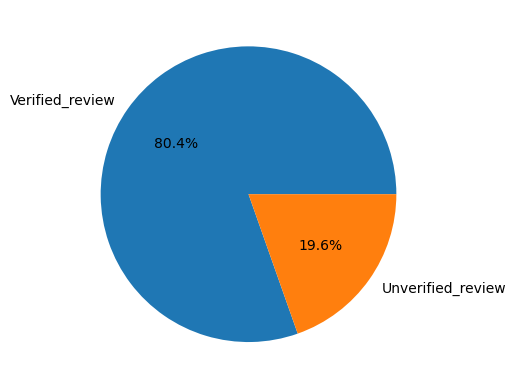

In [258]:
plt.pie(x=verification_distribution,labels=verification_distribution.index,autopct='%1.1f%%')
plt.show()

### ii) Sentiment tag distribution

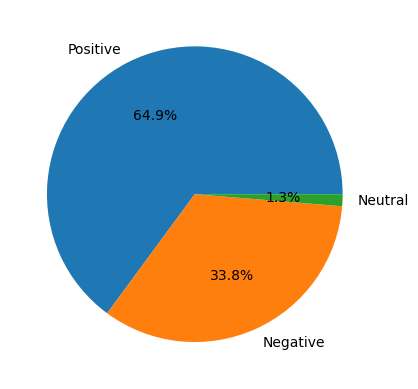

In [266]:
plt.pie(x=Sentiment_division,labels=Sentiment_division.index,autopct='%1.1f%%')
plt.show()

### iii) Wordcloud

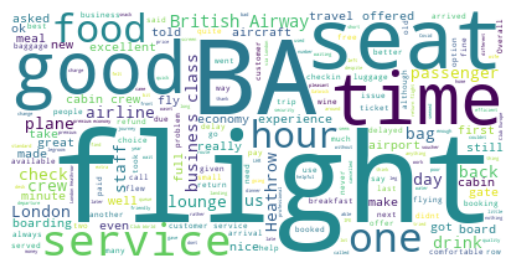

In [283]:
#Positive Wordcloud
textp = " "
for i in df.index:
    if df['sentiment_tag'][i] == "Positive":
        textp = textp + df['cleaned_reviews'][i]
      
wordcloud_positive = WordCloud(background_color="white").generate(textp)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

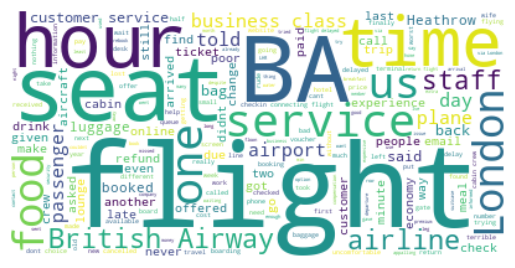

In [285]:
#Negative Wordcloud
textn = " "
for i in df.index:
    if df['sentiment_tag'][i] == "Negative":
        textn = textn + df['cleaned_reviews'][i]
      
wordcloud_negative = WordCloud(background_color="white").generate(textn)


# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

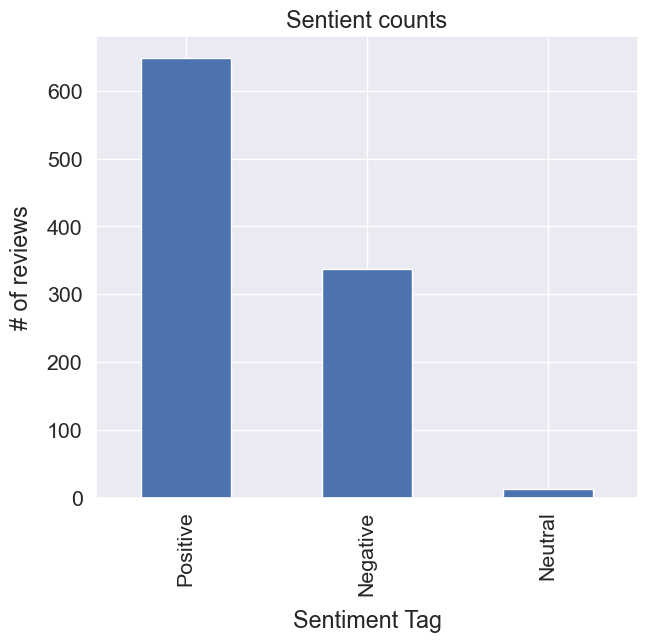

In [296]:
df['sentiment_tag'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Sentiment Tag", labelpad=10)
plt.ylabel("# of reviews", labelpad=10)
plt.title("Sentient counts")
plt.show()